<a href="https://colab.research.google.com/github/dsrivastava565/2Location/blob/master/ProjectApurv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

df=pd.read_csv('sentiment-training.csv',encoding = "ISO-8859-1")
print(df.head())

                                               Tweet  Sentiment Unnamed: 2  \
0  Heres a single  to add  to Kindle. Just read t...    neutral        NaN   
1  If you tire of Non-Fiction.. Check out http://...    neutral        NaN   
2   Ghost of Round Island is supposedly nonfiction.     neutral        NaN   
3  Why is Barnes and Nobles version of the Kindle...   negative        NaN   
4  @Maria:  Do you mean the Nook?  Be careful  bo...   positive        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [9]:
df['Sentiment'].value_counts()

 positive                                                                                                                                                                                                                                               1195
 neutral                                                                                                                                                                                                                                                 523
 negative                                                                                                                                                                                                                                                141
 )                                                                                                                                                                                                                                               

In [12]:
y=df['Sentiment'].values
y.shape
x=df['Tweet'].values
x.shape

(1882,)

In [21]:
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(753,)

In [22]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'tweet'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()


,tweet,sentiment
0,Love my Kindle and what it can do!Love the tex...,positive
1,Wherever I go my Kindle goes with mne..Im so h...,positive
2,I love love my Kindle...my only caveats....I...,positive
3,Cant believe how much I love my Kindle!!,positive
4,Luv my Kindle !!!!,positive


In [23]:

df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'tweet'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,tweet,sentiment
0,It is a great.,positive
1,My little one is the same way. Thats why I lov...,positive
2,$24.99 for a fabric sleeve??? This should be $...,positive
3,I ordered mine on Monday morning cant wait!!,positive
4,I LOVE my Kindle! Were a family of 6 who are w...,positive


In [24]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [27]:
df_train['tweet']= df_train['tweet'].apply(lambda x:remove_punctuation(x))
df_test['tweet']= df_test['tweet'].apply(lambda x:remove_punctuation(x))

In [ ]:
df_train.head()
#punctuations are removed from news column in train dataset

In [ ]:
#importing NLTK
#downloading stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [30]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

#get the count of every word in both the columns of df_train and df_test dataframe


In [ ]:
#positive
for text in df_train[df_train.sentiment==df_train.sentiment[0]].tweet:
  for word in generate_N_grams(text):
    positiveValues[word]= positiveValues[word]+1



In [ ]:
for text in df_train[df_train.sentiment==df_train.sentiment[1128]].tweet:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [ ]:
for text in df_train[df_train.sentiment==df_train.sentiment[1127]].tweet:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [90]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [91]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [92]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

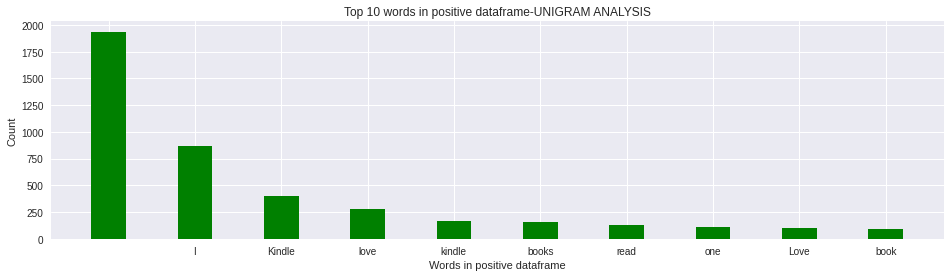

In [93]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()


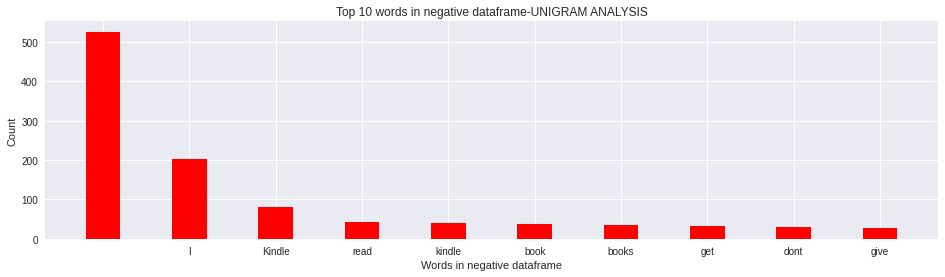

In [94]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

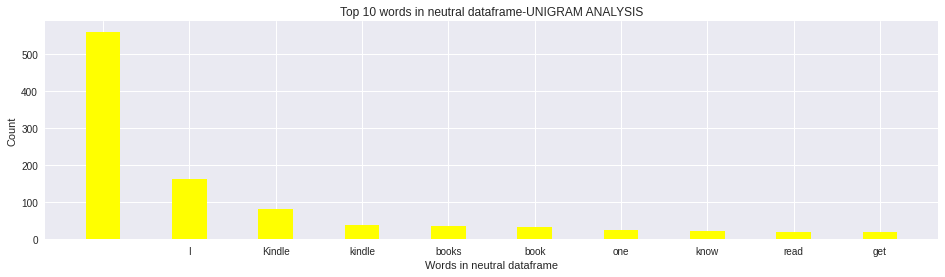

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()